<a href="https://colab.research.google.com/github/KalaiKumarP/content/blob/main/EDA_on_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("retail_sales_dataset.csv")
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Check if any missing value in dataset

In [4]:
print(data.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


Drop or fill the missing values

In [7]:
#data.dropna(inplace=True)
data=data.fillna(method='ffill')

<ipython-input-7-108ad272e943>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data=data.fillna(method='ffill')


Remove the Duplicate entry

In [8]:
data=data.drop_duplicates()

Convert Date column to datetime

In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Summary of numerical columns

In [11]:
print(data.describe())

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

Summary of categorical columns

In [12]:
print(data.describe(include=['object']))

       Customer ID  Gender Product Category
count         1000    1000             1000
unique        1000       2                3
top        CUST001  Female         Clothing
freq             1     510              351


Calculate specific metrics

In [14]:
print("Mean Total Amount:", data['Total Amount'].mean())
print("Median Total Amount:", data['Total Amount'].median())
print("Mode Total Amount:", data['Total Amount'].mode()[0])
print("Standard Deviation of Total Amount:", data['Total Amount'].std())

Mean Total Amount: 456.0
Median Total Amount: 135.0
Mode Total Amount: 50
Standard Deviation of Total Amount: 559.997631555123


Time Series Analysis

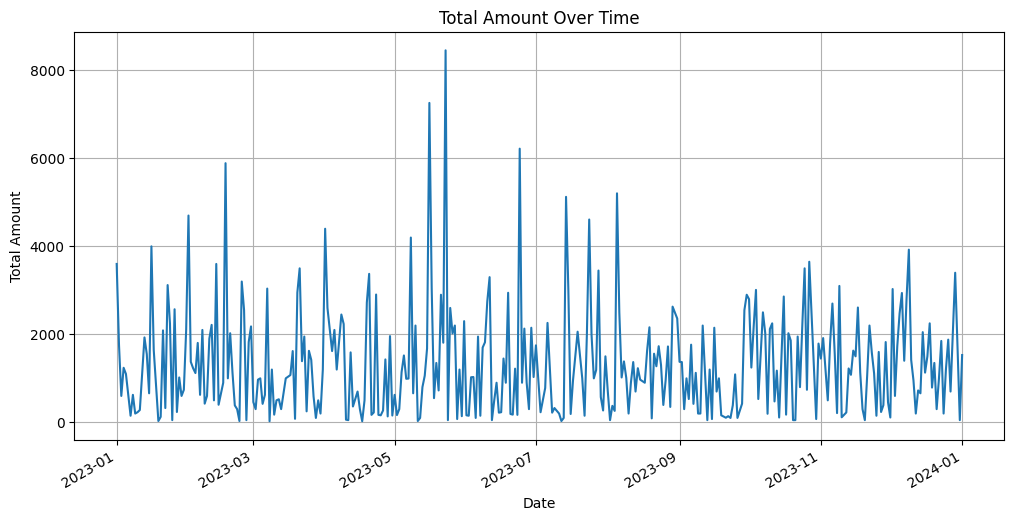

In [15]:
# Group by date and sum sales
time_series = data.groupby('Date')['Total Amount'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
time_series.plot()
plt.title('Total Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid()
plt.show()


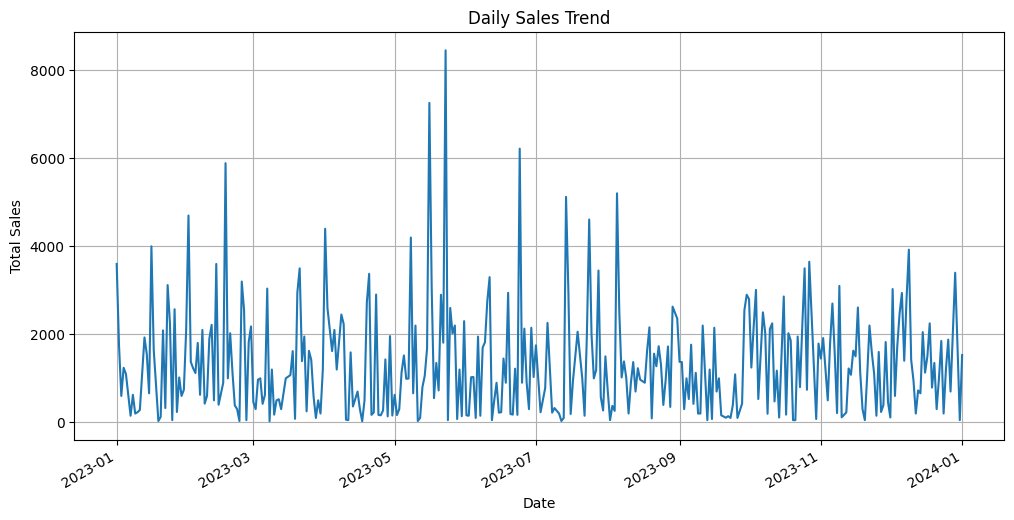

In [16]:
# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group by date and calculate total sales per day
daily_sales = data.groupby('Date')['Total Amount'].sum()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


Analyze the purchasing behavior of customers

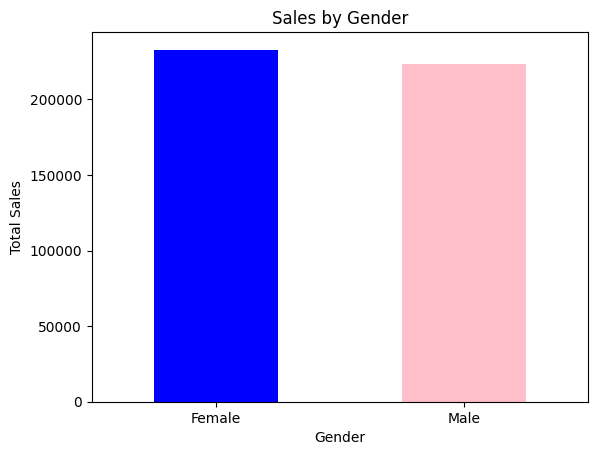

In [17]:
# Group by Gender and calculate total sales
sales_by_gender = data.groupby('Gender')['Total Amount'].sum()

# Plot sales by gender
sales_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

Age Distribution

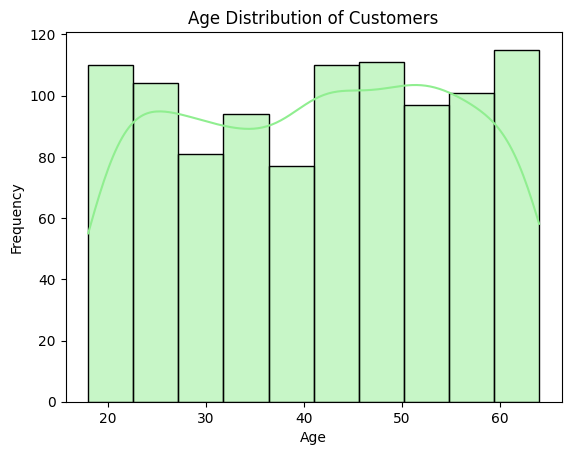

In [20]:
# Plot age distribution of customers
sns.histplot(data['Age'], bins=10, kde=True, color='lightgreen')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Top Product Categories by Sales

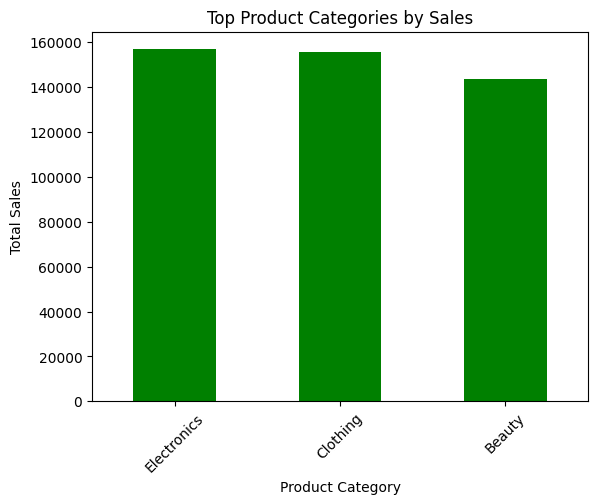

In [21]:
# Group by Product Category and calculate total sales
sales_by_category = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Bar plot for product categories
sales_by_category.plot(kind='bar', color='green')
plt.title('Top Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

Quantity Sold by Product Category

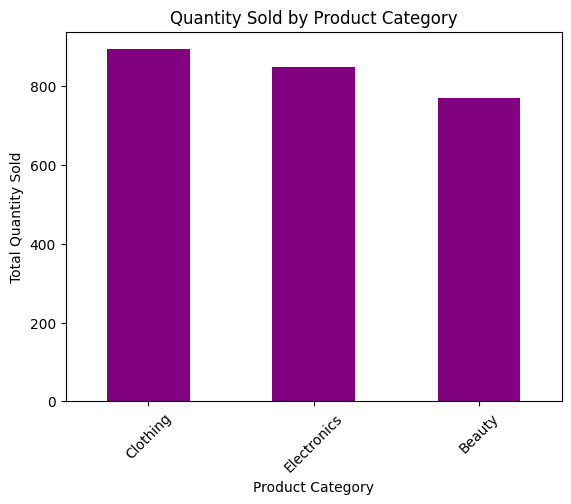

In [22]:
# Group by Product Category and calculate total quantity sold
quantity_by_category = data.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

# Bar plot for quantities sold
quantity_by_category.plot(kind='bar', color='purple')
plt.title('Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

**Correlation Analysis**:
Analyze the relationships between numerical fields such as Quantity, Price per Unit, and Total Amount:

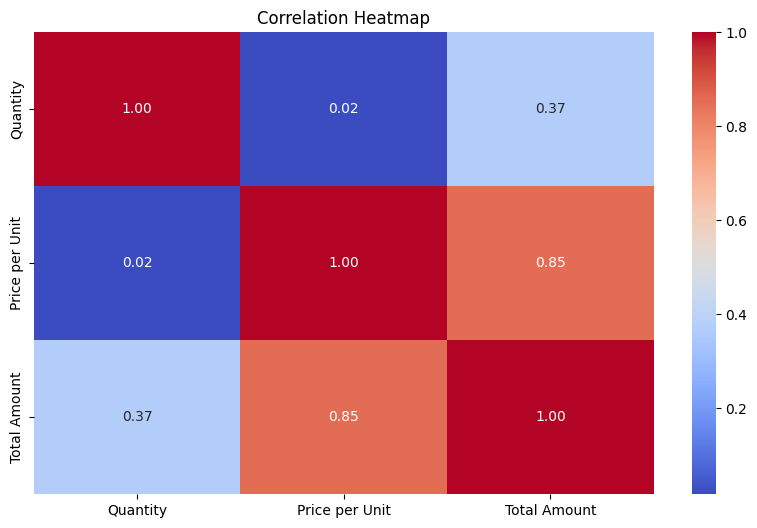

In [23]:
# Compute correlation matrix
correlation_matrix = data[['Quantity', 'Price per Unit', 'Total Amount']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Visualize the distribution of the Total Amount field

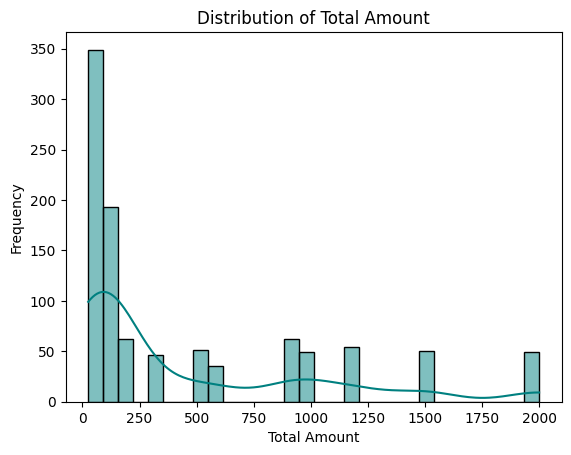

In [24]:
# Plot sales distribution
sns.histplot(data['Total Amount'], kde=True, bins=30, color='teal')
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

Analyze sales trends over time for each product category

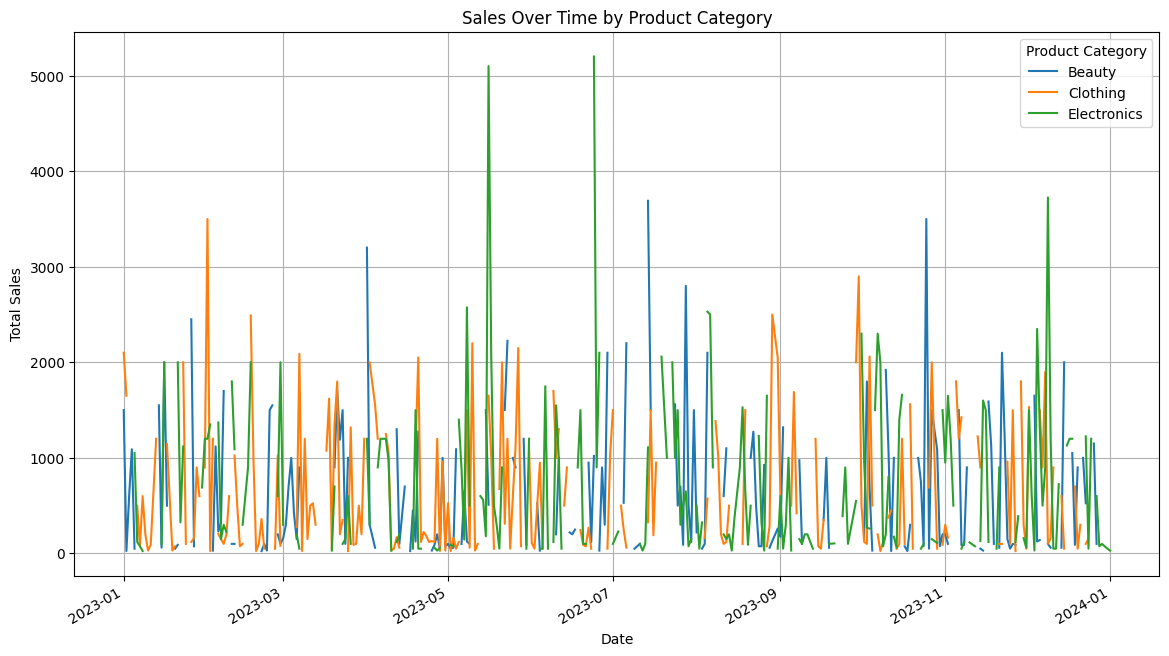

In [25]:
# Group by date and product category, summing the total amount
sales_over_time = data.groupby(['Date', 'Product Category'])['Total Amount'].sum().unstack()

# Plot sales trends by category
sales_over_time.plot(figsize=(14, 8))
plt.title('Sales Over Time by Product Category')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.grid()
plt.show()